done


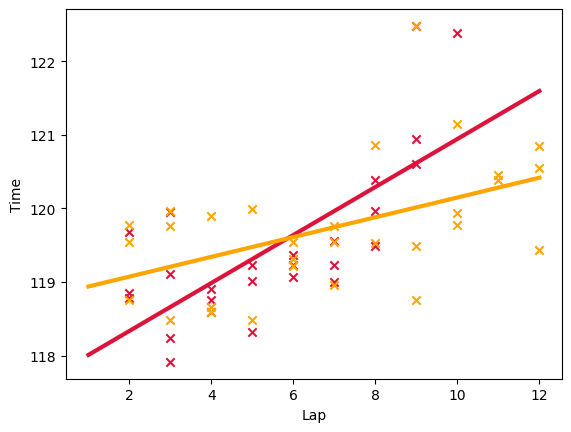

In [9]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pygad

from simracing.io import parse_lap_times
from simracing.models import fit_linear_models
from simracing.constants import Tyre


def _partition_stints(strategy):
    stints = [[strategy[0], 1]]
    for compound in strategy[1:]:
        if compound == -1:  # no tyre change
            stints[-1][1] += 1  # one more lap in current stint
        else:
            stints.append([compound, 1])
    return stints


assert _partition_stints([1, -1, -1, -1, -1, 2, -1, -1, -1, -1]) == [[1, 5], [2, 5]]
assert _partition_stints([1, -1, -1, 1, -1, -1, 1, -1, -1]) == [[1, 3], [1, 3], [1, 3]]
assert _partition_stints([1, 2, 3]) == [[1, 1], [2, 1], [3, 1]]
assert _partition_stints([1, -1, -1]) == [[1, 3]]


def _evaluate_strategy(stints, models, max_stint_length, pit_cost, required_compounds):
    if stints[0][0] == -1:  # must start on some tyres
        return float("inf")
    if any(stint_length > max_stint_length for _, stint_length in stints):
        return float("inf")
    if set(s[0] for s in stints) & required_compounds != required_compounds:
        return float("inf")
    time = 0
    for compound_id, stint_length in stints:
        compound = ("RS", "RM", "RH")[compound_id]
        x = [[i] for i in range(stint_length)]
        stint_time = sum(models[compound].predict(x))
        time += stint_time
    time += (len(stints) - 1) * pit_cost
    return time


def predict_top_strategies(
    *,
    data: str,
    available_compounds: set,
    required_compounds: set,
    lap_count: int,
    max_stint_length: int,
    pit_cost: float
):
    lap_time_data = parse_lap_times(data)
    
    models = fit_linear_models(lap_time_data, max_stint_length)

    def fitness_function(ga_instance, solution, solution_idx):
        stints = _partition_stints(solution)
        # negate result so that the solution is minimized
        return -_evaluate_strategy(stints, models, max_stint_length, pit_cost, required_compounds)

#     for i in range(1):
#         ga_instance = pygad.GA(
#             fitness_func=fitness_function,
#             num_genes=lap_count,
#             gene_type=int,
#             gene_space=[-1, *available_compounds],
#             num_generations=512,
#             sol_per_pop=512,
#             keep_elitism=64,
#             stop_criteria="saturate_128",
#             parent_selection_type="rank",
#             num_parents_mating=8,
#             crossover_type="two_points",
#             mutation_type="scramble"
#         )
#         ga_instance.run()

#         ga_instance.plot_fitness()
#         best = ga_instance.best_solution()
#         stints = _partition_stints(best[0])
#         print(
#             len(stints), 
#             stints, 
#             _evaluate_strategy(stints, models, max_stint_length, pit_cost, required_compounds)
#         )


#     return ga_instance, models


RS = 0
RM = 1
RH = 2

# 1. Lago Maggiore; Tx4; Fx3

data = """
Lap	RS	RM
2	118.849	
3	119.106	
4	118.758	
		
2	119.681	119.777
3	119.949	119.961
4		119.898
5	119.228	
6	119.366	119.225
7	119.554	119.768
8	120.389	119.533
9	120.944	119.490
10		119.782
11		120.388
12		120.556
		
2	118.787	119.546
3	118.237	119.758
4	118.592	118.596
5	118.327	119.996
6	119.066	119.544
7	119.007	119.545
8	119.967	120.864
9	122.480	122.476
10	122.380	119.937
11		120.460
12		120.853
		
2		118.762
3	117.915	118.488
4	118.900	118.663
5	119.009	118.490
6	119.237	119.316
7	119.236	118.959
8	119.486	
9	120.605	118.762
10		121.148
11		
12		119.432
"""

predict_top_strategies(
    data=data,
    available_compounds={RS, RM},
    required_compounds={RS, RM},
    lap_count=20,
    max_stint_length=12,
    pit_cost=14,
)

print("done")

done


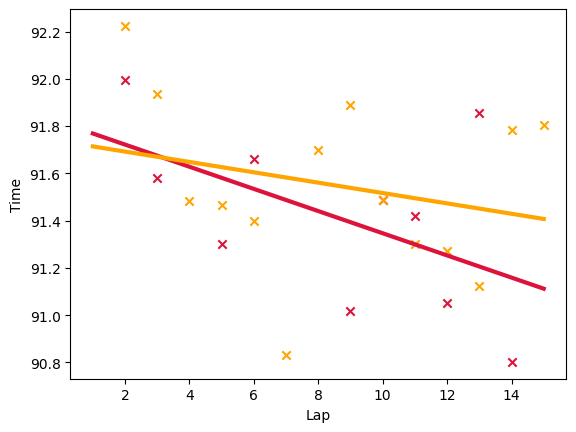

In [10]:
# 2. Red Bull Ring; Tx5; Fx3

data = """
Lap	RS	RM
2	91.994	92.224
3	91.580	91.934
4		91.481
5	91.301	91.465
6	91.660	91.398
7		90.831
8		91.697
9	91.018	91.889
10	91.487	91.489
11	91.420	91.302
12	91.051	91.273
13	91.856	91.124
14	90.802	91.783
15		91.805
"""

predict_top_strategies(
    data=data,
    available_compounds={RS, RM},
    required_compounds={RS, RM},
    lap_count=26,
    max_stint_length=15,
    pit_cost=20,  # guesstimate
)

print("done")

In [11]:
# _evaluate_strategy(((0, 15), (1, 11)), models, 15, 20, {0, 1})

In [12]:
# _evaluate_strategy(((0, 11), (1, 15)), models, 15, 20, {0, 1})

In [13]:
# _evaluate_strategy(((0, 12), (0, 12), (1, 2)), models, 15, 20, {0, 1})